In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def conv2d_to_matmul(input, conv_layer):
    # Extract Conv2D parameters
    in_channels = conv_layer.in_channels
    out_channels = conv_layer.out_channels
    kernel_size = conv_layer.kernel_size
    stride = conv_layer.stride
    padding = conv_layer.padding
    dilation = conv_layer.dilation

    # Unfold (im2col) the input tensor
    input_unf = F.unfold(input, kernel_size=kernel_size, dilation=dilation, padding=padding, stride=stride)

    # Reshape the weight tensor of the conv layer
    weight = conv_layer.weight.view(out_channels, -1)

    # Perform matrix multiplication
    output_unf = weight @ input_unf

    # Reshape the output to the correct dimensions
    output_height = (input.size(2) + 2*padding[0] - dilation[0] * (kernel_size[0] - 1) - 1) // stride[0] + 1
    output_width = (input.size(3) + 2*padding[1] - dilation[1] * (kernel_size[1] - 1) - 1) // stride[1] + 1
    output = output_unf.view(1, out_channels, output_height, output_width)

    return output

# Example usage
input = torch.randn(1, 3, 5, 5)  # Batch size 1, 3 channels, 5x5 image
conv_layer = nn.Conv2d(in_channels=3, out_channels=2, kernel_size=3, stride=1, padding=1)

# Get the output using the conv2d_to_matmul function
output = conv2d_to_matmul(input, conv_layer)

# Verify against the standard convolution
conv_output = conv_layer(input)

print("Output from matrix multiplication:")
print(output)

print("Output from standard convolution:")
print(conv_output)

# Verify that the outputs are the same
print("Difference between outputs:", torch.abs(output - conv_output).max())


Output from matrix multiplication:
tensor([[[[-0.2798, -0.0576,  0.4760, -0.0022,  0.5965],
          [-0.3831, -0.6861,  0.1310, -0.2115,  0.6901],
          [ 0.1581, -0.3168, -0.4913, -0.9078, -0.0365],
          [-0.1768, -0.2058, -1.0859, -0.3986, -0.3868],
          [-0.3603, -0.2312, -1.2773, -0.3161,  0.3108]],

         [[ 0.1639,  0.0842,  0.9165, -0.2983, -0.2242],
          [-0.0229, -0.0566, -0.1032, -0.2204, -0.1244],
          [ 0.2391,  0.2545,  0.6743, -0.2300, -0.2058],
          [-0.1515,  0.7881,  0.5873, -0.8179, -0.1022],
          [ 0.1383, -0.2363, -0.0521, -0.9489, -0.5987]]]],
       grad_fn=<ViewBackward0>)
Output from standard convolution:
tensor([[[[-0.4578, -0.2355,  0.2980, -0.1801,  0.4185],
          [-0.5611, -0.8640, -0.0470, -0.3895,  0.5121],
          [-0.0199, -0.4947, -0.6693, -1.0858, -0.2144],
          [-0.3547, -0.3838, -1.2639, -0.5765, -0.5648],
          [-0.5383, -0.4092, -1.4553, -0.4941,  0.1328]],

         [[ 0.2126,  0.1329,  0.9652,

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def conv2d_to_matmul(input, conv_layer):
    # Extract Conv2D parameters
    in_channels = conv_layer.in_channels
    out_channels = conv_layer.out_channels
    kernel_size = conv_layer.kernel_size
    stride = conv_layer.stride
    padding = conv_layer.padding
    dilation = conv_layer.dilation

    # Unfold (im2col) the input tensor
    input_unf = F.unfold(input, kernel_size=kernel_size, dilation=dilation, padding=padding, stride=stride)

    # Reshape the weight tensor of the conv layer
    weight = conv_layer.weight.view(out_channels, -1)

    # Perform matrix multiplication
    output_unf = weight @ input_unf

    # Add the bias
    if conv_layer.bias is not None:
        output_unf += conv_layer.bias.unsqueeze(1)

    # Reshape the output to the correct dimensions
    output_height = (input.size(2) + 2*padding[0] - dilation[0] * (kernel_size[0] - 1) - 1) // stride[0] + 1
    output_width = (input.size(3) + 2*padding[1] - dilation[1] * (kernel_size[1] - 1) - 1) // stride[1] + 1
    output = output_unf.view(1, out_channels, output_height, output_width)

    return output

# Example usage
input = torch.randn(1, 3, 5, 5)  # Batch size 1, 3 channels, 5x5 image
conv_layer = nn.Conv2d(in_channels=3, out_channels=2, kernel_size=3, stride=1, padding=1)

# Get the output using the conv2d_to_matmul function
output = conv2d_to_matmul(input, conv_layer)

# Verify against the standard convolution
conv_output = conv_layer(input)

print("Output from matrix multiplication:")
print(output)

print("Output from standard convolution:")
print(conv_output)

# Verify that the outputs are the same
print("Difference between outputs:", torch.abs(output - conv_output).max())


Output from matrix multiplication:
tensor([[[[ 0.0647, -0.8771,  0.1172, -0.5919, -0.2884],
          [-0.3678,  0.0288, -0.7642,  0.3269,  0.8414],
          [-0.6333,  0.6534, -0.2398, -0.1189,  0.4273],
          [ 0.0820, -0.0814,  0.0694, -0.1249, -0.5725],
          [ 0.0334, -0.4556, -0.1662,  0.8488, -0.5382]],

         [[ 0.1186,  0.5653, -0.8192,  0.3583,  0.0349],
          [ 0.4989,  0.4936,  1.6190,  0.3322,  0.5158],
          [ 0.5491, -0.8562,  0.6179, -0.2699, -0.4139],
          [-0.1246,  0.0294,  0.9565, -0.3862,  0.1130],
          [ 0.3713,  0.5061, -0.0591,  0.4057,  0.5807]]]],
       grad_fn=<ViewBackward0>)
Output from standard convolution:
tensor([[[[ 0.0647, -0.8771,  0.1172, -0.5919, -0.2884],
          [-0.3678,  0.0288, -0.7642,  0.3269,  0.8414],
          [-0.6333,  0.6534, -0.2398, -0.1189,  0.4273],
          [ 0.0820, -0.0814,  0.0694, -0.1249, -0.5725],
          [ 0.0334, -0.4556, -0.1662,  0.8488, -0.5382]],

         [[ 0.1186,  0.5653, -0.8192,

In [68]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def conv2d_to_matmul(input, conv_layer):


    out_channels = conv_layer.out_channels
    kernel_size = conv_layer.kernel_size
    stride = conv_layer.stride
    padding = conv_layer.padding
    dilation = conv_layer.dilation

 
    input_unf = F.unfold(input, kernel_size=kernel_size, dilation=dilation, padding=padding, stride=stride)

    weight = conv_layer.weight.view(out_channels, -1)


    output_unf = weight @ input_unf

    if conv_layer.bias is not None:
        output_unf += conv_layer.bias.unsqueeze(1)

    output_height = (input.size(2) + 2*padding[0] - dilation[0] * (kernel_size[0] - 1) - 1) // stride[0] + 1
    output_width = (input.size(3) + 2*padding[1] - dilation[1] * (kernel_size[1] - 1) - 1) // stride[1] + 1
    output = output_unf.view(1, out_channels, output_height, output_width)

    return output


with torch.no_grad():
    input = torch.randn(1, 3, 55, 55)  
    conv_layer = nn.Conv2d(in_channels=3, out_channels=20, kernel_size=3, stride=1, padding=1)

    output = conv2d_to_matmul(input, conv_layer)


    conv_output = conv_layer(input)

print("Output from matrix multiplication:")
print(output)

print("Output from standard convolution:")
print(conv_output)


print("Difference between outputs:", torch.abs(output - conv_output).max())

Output from matrix multiplication:
tensor([[[[-5.9511e-01,  2.4230e-02,  8.9785e-01,  ..., -5.9544e-03,
            5.1965e-01,  2.6802e-01],
          [ 5.0542e-01, -2.6269e-01, -3.3766e-01,  ...,  6.4516e-01,
           -4.6110e-01,  8.7037e-02],
          [-8.9443e-01, -3.3619e-01,  3.2683e-01,  ..., -3.8791e-01,
            5.8959e-01, -7.0960e-01],
          ...,
          [-5.3951e-02, -1.2812e+00,  1.8055e+00,  ...,  2.8394e-02,
            1.3544e-01, -1.3282e-01],
          [ 4.2357e-01,  6.8827e-01, -6.9377e-01,  ...,  8.3338e-01,
           -2.9679e-02,  4.1256e-01],
          [-4.0692e-01,  4.5084e-01,  5.2870e-02,  ...,  5.9891e-02,
            7.7406e-01, -3.9062e-04]],

         [[-3.6356e-02,  2.5435e-01,  7.3083e-01,  ...,  2.0529e-01,
            6.9218e-01,  4.0681e-01],
          [ 3.2843e-01,  6.3511e-01,  9.3635e-01,  ...,  3.1694e-01,
            1.1242e-01,  1.1595e-01],
          [-6.0154e-01, -1.3192e-01,  1.2443e-01,  ..., -5.0678e-01,
           -4.8619e-01,

In [73]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd.functional import jacobian

def spectral_norm(matrix):
    u, s, v = torch.svd(matrix, some=True)
    return s.max()

def lipschitz_constant(network, input_shape):
    lipschitz_constants = []

    def register_hook(layer):
        if isinstance(layer, (nn.Linear, nn.Conv2d)):
            def hook(module, input, output):
                if isinstance(module, nn.Linear):
                    weight = module.weight.data
                elif isinstance(module, nn.Conv2d):
                    weight = module.weight.data.view(module.out_channels, -1)
                lipschitz_constants.append(spectral_norm(weight))
            return layer.register_forward_hook(hook)

    hooks = []
    for layer in network.modules():
        hook = register_hook(layer)
        if hook:
            hooks.append(hook)

    input_tensor = torch.randn(*input_shape)
    network(input_tensor)


    for hook in hooks:
        hook.remove()


    total_lipschitz_constant = torch.prod(torch.tensor(lipschitz_constants))

    return total_lipschitz_constant.item()


In [78]:
import torchvision.models as models

model = models.vgg19(weights=models.VGG19_Weights.DEFAULT)
input_shape = (1, 3, 224, 224
               ) 
lipschitz_const = lipschitz_constant(model, input_shape)
print(f"Constante de Lipschitz du réseau: {lipschitz_const}")

Constante de Lipschitz du réseau: 721536352256.0


In [89]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

def find_maximizing_input(network, target_class, input_shape, num_iterations=300, learning_rate=0.01):
 
    input_tensor = torch.randn(input_shape, requires_grad=True)

    optimizer = optim.Adam([input_tensor], lr=learning_rate)

    for iteration in range(num_iterations):
        optimizer.zero_grad()

        output = network(input_tensor)

        target_output = output[0, target_class]

        loss = -target_output

     
        loss.backward()

        optimizer.step()

        with torch.no_grad():
            input_tensor.clamp_(0, 1)  

        if iteration % 10 == 0:
            print(f"Iteration {iteration}, Loss: {loss.item()}")

    return input_tensor

vgg19 = models.vgg19(pretrained=True)

input_shape = (1, 3, 224, 224)
target_class = 10

maximizing_input = find_maximizing_input(vgg19, target_class, input_shape)

print("Tenseur d'entrée qui maximise la sortie:")
print(maximizing_input)


/home/guillaume/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/guillaume/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Iteration 0, Loss: 2.0617432594299316
Iteration 10, Loss: -5.5193915367126465
Iteration 20, Loss: -10.756346702575684
Iteration 30, Loss: -22.763427734375
Iteration 40, Loss: -54.74723434448242
Iteration 50, Loss: -74.90886688232422
Iteration 60, Loss: -114.947021484375
Iteration 70, Loss: -128.90609741210938
Iteration 80, Loss: -145.79978942871094
Iteration 90, Loss: -203.3134002685547
Iteration 100, Loss: -190.97267150878906
Iteration 110, Loss: -243.62135314941406
Iteration 120, Loss: -260.3282775878906
Iteration 130, Loss: -265.938232421875
Iteration 140, Loss: -329.7197570800781
Iteration 150, Loss: -340.07586669921875
Iteration 160, Loss: -359.0157165527344
Iteration 170, Loss: -412.3768005371094
Iteration 180, Loss: -386.5377502441406
Iteration 190, Loss: -403.0248107910156
Iteration 200, Loss: -494.2942199707031
Iteration 210, Loss: -459.6971130371094
Iteration 220, Loss: -498.4586486816406
Iteration 230, Loss: -463.32598876953125
Iteration 240, Loss: -489.6029968261719
Iterati

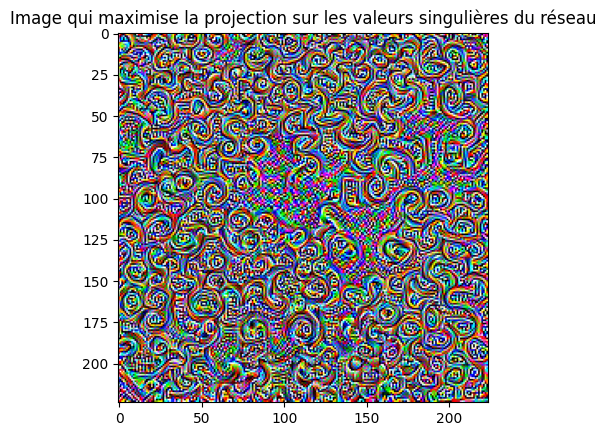

In [99]:
import numpy as np
import matplotlib.pyplot as plt
maximizing_input_np = maximizing_input.squeeze(0).detach().numpy()
maximizing_input_np = np.transpose(maximizing_input_np, (1, 2, 0))

# Afficher l'image qui maximise la sortie du réseau
plt.imshow(maximizing_input_np)
plt.title("Image qui maximise la projection sur les valeurs singulières du réseau")
plt.show()

In [91]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

def find_maximizing_input(network, input_shape, num_iterations=100, learning_rate=0.01):
    # Initialiser une entrée aléatoire
    input_tensor = torch.randn(input_shape, requires_grad=True)

    # Définir l'optimiseur
    optimizer = optim.Adam([input_tensor], lr=learning_rate)

    for iteration in range(num_iterations):
        optimizer.zero_grad()

        # Calculer la sortie du réseau
        output = input_tensor
        projections = []

        for layer in network.children():
            if isinstance(layer, nn.Conv2d):
                weight = layer.weight.data.view(layer.out_channels, -1)
                u, s, v = torch.svd(weight)
                v1 = v[:, 0] 
                output_unfolded = F.unfold(output, kernel_size=layer.kernel_size, padding=layer.padding, stride=layer.stride)
                projection = torch.matmul(v1, output_unfolded)
                projections.append(projection)
                output = layer(output)
            elif isinstance(layer, nn.Linear):
                weight = layer.weight.data
                u, s, v = torch.svd(weight)
                v1 = v[:, 0]  
                projection = torch.matmul(v1, output.view(output.size(0), -1).t())
                projections.append(projection)
                output = layer(output.view(output.size(0), -1))
            elif isinstance(layer, nn.Sequential) or isinstance(layer, nn.ReLU) or isinstance(layer, nn.MaxPool2d):
                output = layer(output)
            else:
                raise NotImplementedError(f"Layer type {type(layer)} is not supported.")

        total_projection = sum(torch.norm(p) for p in projections)

      
        loss = -total_projection

        loss.backward()

       
        optimizer.step()

        with torch.no_grad():
            input_tensor.clamp_(0, 1) 

        if iteration % 10 == 0:
            print(f"Iteration {iteration}, Loss: {loss.item()}")

    return input_tensor


vgg19 = models.vgg19(pretrained=True)


input_shape = (1, 3, 224, 224)


maximizing_input = find_maximizing_input(vgg19.features, input_shape)

print("Tenseur d'entrée qui maximise la projection sur les valeurs singulières:")
print(maximizing_input)


Iteration 0, Loss: -11674.58203125
Iteration 10, Loss: -9061.9609375
Iteration 20, Loss: -12944.9970703125
Iteration 30, Loss: -16802.166015625
Iteration 40, Loss: -20376.11328125
Iteration 50, Loss: -23607.6328125
Iteration 60, Loss: -26506.654296875
Iteration 70, Loss: -29071.6640625
Iteration 80, Loss: -31332.09375
Iteration 90, Loss: -33340.5703125
Tenseur d'entrée qui maximise la projection sur les valeurs singulières:
tensor([[[[0.1762, 0.8393, 1.0000,  ..., 0.0000, 0.0000, 0.0000],
          [1.0000, 1.0000, 0.2257,  ..., 1.0000, 0.8724, 1.0000],
          [1.0000, 0.2356, 0.4804,  ..., 0.7165, 0.6216, 0.9742],
          ...,
          [0.0000, 1.0000, 0.9865,  ..., 0.6519, 0.0000, 0.0000],
          [0.8425, 1.0000, 0.7883,  ..., 0.2073, 0.0376, 0.0765],
          [1.0000, 1.0000, 1.0000,  ..., 0.0425, 0.1960, 0.1435]],

         [[0.5889, 1.0000, 0.7434,  ..., 0.0000, 0.0000, 0.0000],
          [0.8259, 0.0000, 0.0000,  ..., 0.1542, 0.0000, 0.0000],
          [0.1004, 0.0000, 

In [97]:
torch.max(model(maximizing_input))


tensor(20.8577, grad_fn=<MaxBackward1>)

In [95]:
torch.max(maximizing_input)

tensor(1., grad_fn=<MaxBackward1>)